<h1 style="text-align: center; font-weight: bold;">Module-02</h1>
<h3 style="text-align: center;">Data Bias</h3>
<h3 style="text-align: center;">DATA-6550</h3>

<h4 style="text-align: center; line-height: 1.5;">By<br><b>Richard Hoehn</b></h4>

<hr style="height:10px; border:0px; background: linear-gradient(to right, white, blue, white); margin:50px;">

# Import Libraries & Setup Constants

In [3]:
# Imports of main Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Chi-Square Test
from scipy.stats import chi2_contingency

# Handle Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#style options
%matplotlib inline

# Main Settings for Panda Display & Plotting Colors
pd.set_option('display.max_columns', 500) # Allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use('seaborn-v0_8') # A style that can be used for plots

# Constants - General Use
DEV_SIZE  = 1 # Development Size of Dataset
RND       = 42  # Randome Init
TEST_SIZE = 0.3 # Size of Training Data Used
STARS     = 50  # Sapcer for comments

In [7]:
#---------------------------------------------------------
#--- Date Loading into Single Dataframe
#---------------------------------------------------------

# 01 - Import
print("Importing Data")
print("*"*STARS)
df = pd.read_csv('../../Data/adult.csv')

# 02 - Display Row Count
print(f"UCI Adult Data => {df.shape[0]:,.0f} Rows")
print("*"*STARS)

# 03 - Show DataFrame
display(df.head(10))

Importing Data
**************************************************
UCI Adult Data => 32,561 Rows
**************************************************


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


## Analiys

**************************************************


income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

**************************************************


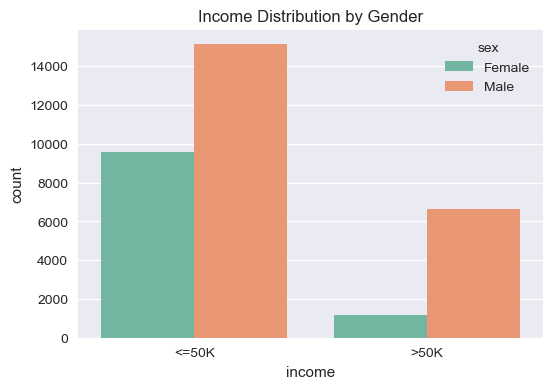

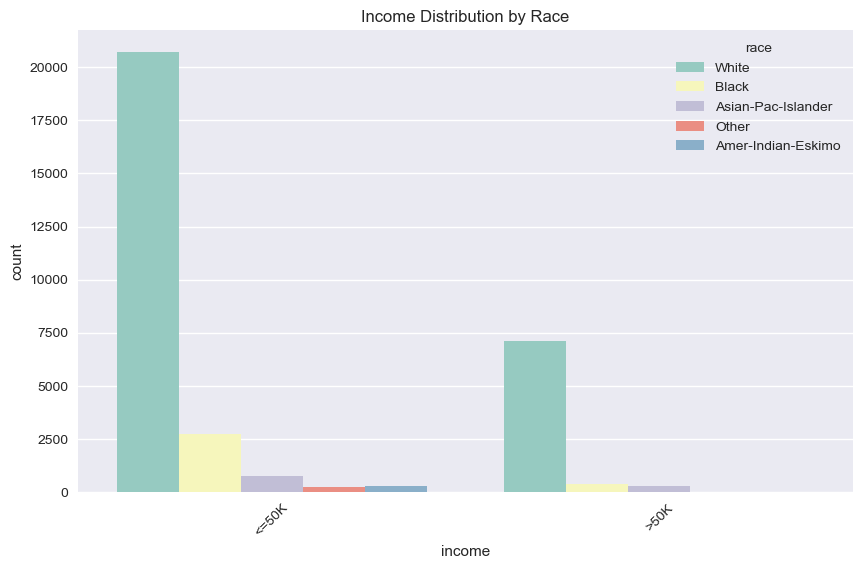

<Figure size 1200x600 with 0 Axes>

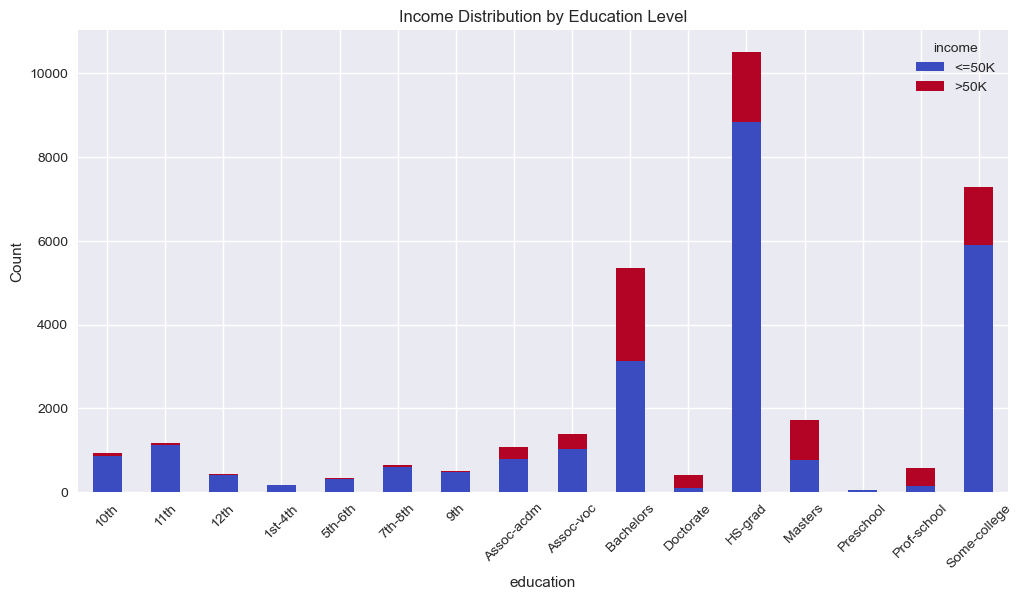

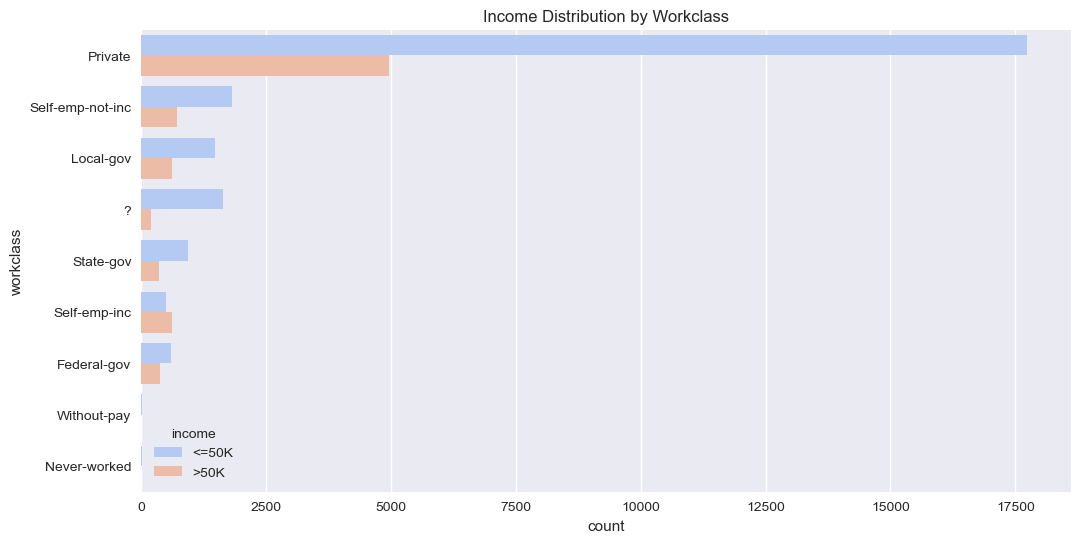

In [9]:
#---------------------------------------------------------
#--- Data & Visualizations
#---------------------------------------------------------

# 01 - Checking class balance for income
print("*"*STARS)
display(df['income'].value_counts(normalize=True) * 100)
print("*"*STARS)

# 02 - Gender Bias Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='income', hue='sex', data=df, palette='Set2')
plt.title('Income Distribution by Gender')
plt.show()

# 03 - Race Bias Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='race', data=df, palette='Set3')
plt.title('Income Distribution by Race')
plt.xticks(rotation=45)
plt.show()

# 04 - Education Level vs Income
plt.figure(figsize=(12, 6))
edu_income = df.groupby(['education', 'income']).size().unstack()
edu_income.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Income Distribution by Education Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# 05 - Workclass Bias Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', hue='income', data=df, palette='coolwarm', order=df['workclass'].value_counts().index)
plt.title('Income Distribution by Workclass')
plt.show()







**************************************************
Chi-Square Test for >>> sex <<<
Chi-Square Statistic: 1517.8134
P-value: 0.0000
Significant association found between sex and income (Potential Bias!!!).
**************************************************





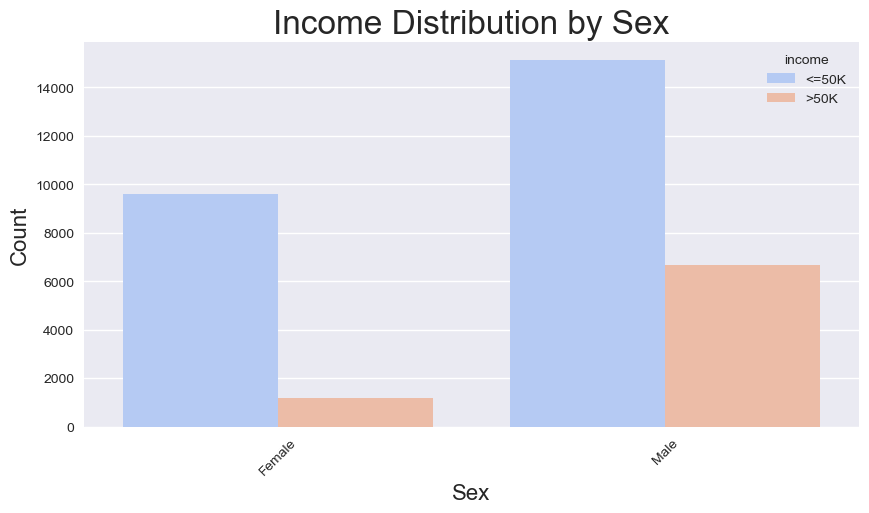







**************************************************
Chi-Square Test for >>> race <<<
Chi-Square Statistic: 330.9204
P-value: 0.0000
Significant association found between race and income (Potential Bias!!!).
**************************************************





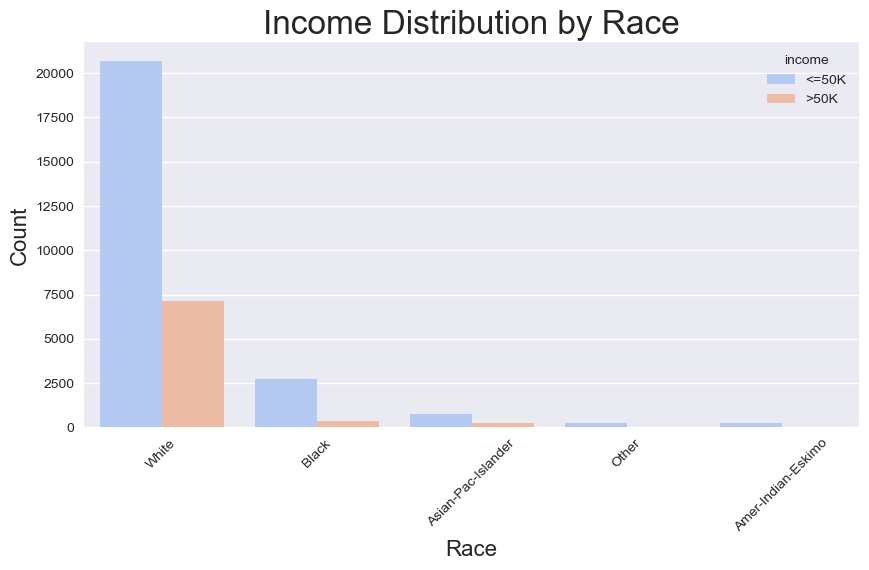







**************************************************
Chi-Square Test for >>> education <<<
Chi-Square Statistic: 4429.6533
P-value: 0.0000
Significant association found between education and income (Potential Bias!!!).
**************************************************





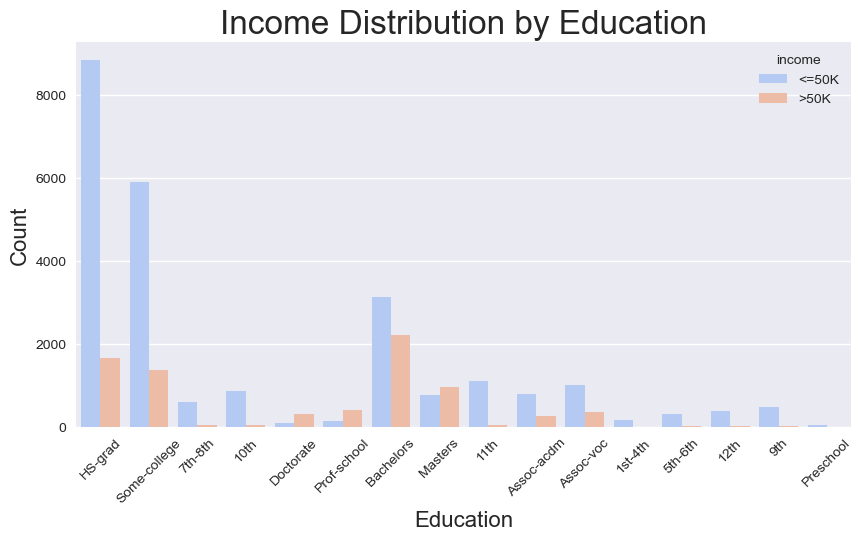







**************************************************
Chi-Square Test for >>> workclass <<<
Chi-Square Statistic: 1045.7086
P-value: 0.0000
Significant association found between workclass and income (Potential Bias!!!).
**************************************************





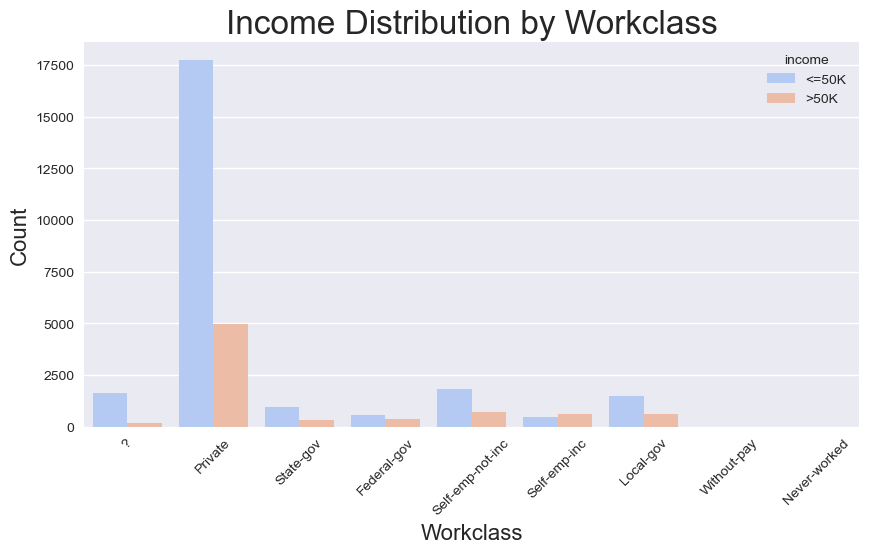







**************************************************
Chi-Square Test for >>> marital.status <<<
Chi-Square Statistic: 6517.7417
P-value: 0.0000
Significant association found between marital.status and income (Potential Bias!!!).
**************************************************





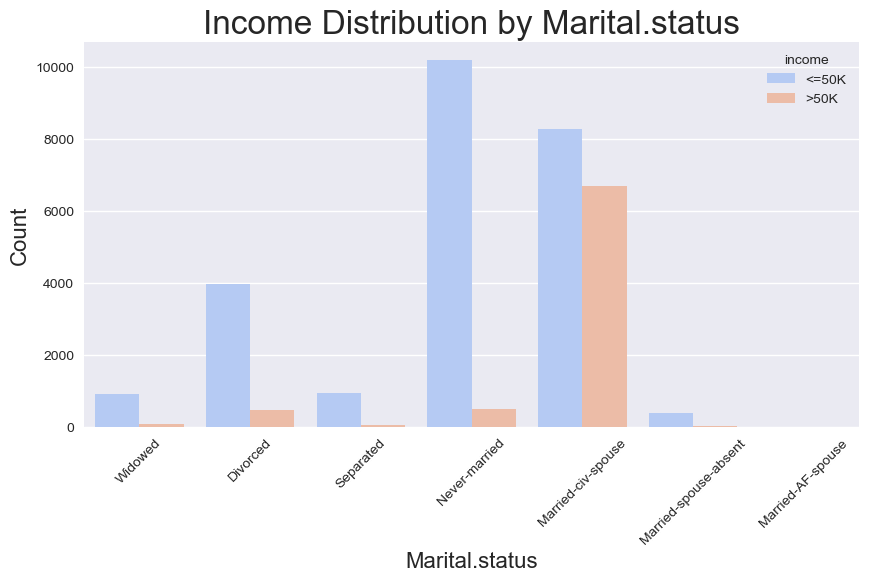

In [25]:
#---------------------------------------------------------
#--- Loop Over Columns and Calc Chi-Squared
#---------------------------------------------------------


# 01 Set Columns for Loop
bias_columns = ['sex', 'race', 'education', 'workclass', 'marital.status']

# 02 Chi-Square Test for Categorical Bias
for col in bias_columns:
    
    # 02.1 - Cross-tab!
    contingency_table = pd.crosstab(df[col], df['income'])
    
    # 02.2 - Chi-Squared
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # 02.3 - Get Print DEtails!
    print("\n"*5)
    print("*"*STARS)
    print(f"Chi-Square Test for >>> {col} <<<")
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    if p < 0.05:
        print(f"Significant association found between {col} and income (Potential Bias!!!).")
    else:
        print(f"No significant association found for {col}.")
    
    print("*"*STARS)
    print("\n"*2)
    # 02.4 - Plot distribution for column
    colCap = col.capitalize()
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], hue=df['income'], palette='coolwarm')
    plt.title(f'Income Distribution by {colCap}')
    plt.title(f'Income Distribution by {colCap}', fontsize=24)  # Larger title font size
    plt.xlabel(colCap, fontsize=16)  # Capitalized x-axis label
    plt.ylabel("Count", fontsize=16)  # Capitalized y-axis label
    plt.xticks(rotation=45)
    plt.show()